In [31]:
import os 
import sys
import pygwalker as pyg
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np

In [32]:

#Importing Configs
# Define the path where config.py is located
#Mac
os.chdir('/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling')
#Linux
#os.chdir('/home/kwnabors/Documents/GitHub/Finance-ML-Modeling')
config_file_path = os.getcwd()
print(config_file_path)

# Add this path to the sys.path
sys.path.append(config_file_path)

import config

#Configs
database_file = config.database
database_folder = config.database_folder
bert_models = config.bert_models
bert_models_local = config.bert_models_local
Sentiment_models = config.Sentiment_models
finbert_models = config.finbert_models

Body = config.Body
Model = config.Model
Model_Subfolder = f'/{Body} Texts/{Model}'
#Model_Folder = config.texts
Model_Folder = config.Sentiment_models
Model_Folder = Model_Folder + Model_Subfolder
Model_Folder = config.Sentiment_models

Body_2 = config.Body_2
Model_2 = config.Model_2
Model_Subfolder_2 = f'/{Body_2} Texts/{Model_2}'
Model_Folder_2 = config.texts
Model_Folder_2 = Model_Folder_2 + Model_Subfolder_2


/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling


In [33]:
df = pd.read_csv(f"{finbert_models}/{Body}_{Model}_finbert model.csv")
df_2 = pd.read_csv(f"{finbert_models}/{Body_2}_{Model_2}_finbert model.csv")

print(df.head())
print(df_2.head())
print(df_2.columns)


   Unnamed: 0        date                                              title  \
0           0  1998-11-12          Modernizing financial services regulation   
1           1  1998-11-06                   Examining community reinvestment   
2           2  1998-11-05  The structure of the international financial s...   
3           3  1998-10-29           Countdown to Y2K: An economic assessment   
4           4  1998-10-27  The future of the financial services sector an...   

                              type  \
0       Governor Laurence H. Meyer   
1      Governor Edward M. Gramlich   
2          Chairman Alan Greenspan   
3   Governor Edward W. Kelley, Jr.   
4  Governor Roger W. Ferguson, Jr.   

                                             segment      tone  sentiment  
0  modernizing financial services regulation  it ...  positive  -0.011628  
1  examining community reinvestment  the federal ...   neutral  -0.018634  
2   this afternoon i intend to address a subject ...  positive

In [34]:
# df['sentiment'] = df['sentiment'].replace({'positive': 1, 'neutral' : 0, 'negative' : -1})
# df_2['sentiment'] = df_2['sentiment'].replace({'positive': 1, 'neutral' : 0, 'negative' : -1})

df['tone'] = df['tone'].replace({'positive': 1, 'neutral' : 0, 'negative' : -1})
df_2['tone'] = df_2['tone'].replace({'positive': 1, 'neutral' : 0, 'negative' : -1})

In [35]:
print(df.columns)
print(df_2.columns)
print(df.head())

Index(['Unnamed: 0', 'date', 'title', 'type', 'segment', 'tone', 'sentiment'], dtype='object')
Index(['Unnamed: 0', 'date', 'title', 'type', 'segment', 'tone', 'sentiment'], dtype='object')
   Unnamed: 0        date                                              title  \
0           0  1998-11-12          Modernizing financial services regulation   
1           1  1998-11-06                   Examining community reinvestment   
2           2  1998-11-05  The structure of the international financial s...   
3           3  1998-10-29           Countdown to Y2K: An economic assessment   
4           4  1998-10-27  The future of the financial services sector an...   

                              type  \
0       Governor Laurence H. Meyer   
1      Governor Edward M. Gramlich   
2          Chairman Alan Greenspan   
3   Governor Edward W. Kelley, Jr.   
4  Governor Roger W. Ferguson, Jr.   

                                             segment  tone  sentiment  
0  modernizing financial ser

In [36]:
df_group = df.copy(deep=True)
df_group = df_group.drop(columns=['Unnamed: 0', 'title', 'type', 'segment'])

df_group['monthly'] = df_group['date'].str[0:7]
#df_group['monthly'] = df_group['date']

print(df_group.columns)
df_group = df_group[['monthly', 'sentiment', 'tone']]
df_group = df_group.groupby('monthly', as_index = False, dropna=True).mean()

df_2_group = df_2.copy(deep=True)
df_2_group = df_2_group.drop(columns=['Unnamed: 0', 'title', 'type', 'segment'])
df_2_group['date'] = df_2_group['date'].astype(str)

#df_2_group['monthly'] = df_2_group['date']
df_2_group['monthly'] = df_2_group['date'].str[0:7]

df_2_group = df_2_group[['monthly', 'sentiment', 'tone']]
df_2_group = df_2_group.groupby('monthly', as_index = False, dropna=True).mean()

df_group = df_group.rename(columns = {'sentiment' : f'{Body}_sentiment'})
df_group = df_group.rename(columns = {'tone' : f'{Body}_tone'})
df_2_group = df_2_group.rename(columns = {'sentiment' : f'{Body_2}_sentiment'})
df_2_group = df_2_group.rename(columns = {'tone' : f'{Body_2}_tone'})

print(df_group.head())
print(df_2_group.head())

df_merged = df_group.merge(df_2_group, on='monthly', how='inner')
df_merged.fillna(0, inplace=True)
print(df_merged.columns)

Index(['date', 'tone', 'sentiment', 'monthly'], dtype='object')
   monthly  Fed_sentiment  Fed_tone
0  1998-06      -0.046817  0.333333
1  1998-07      -0.159269  0.666667
2  1998-09      -0.029537  0.500000
3  1998-10      -0.123802  0.125000
4  1998-11      -0.062241  0.666667
   monthly  ECB_sentiment  ECB_tone
0  1998-06       0.152542  0.000000
1  1998-07      -0.028638  0.000000
2  1998-09       0.070406  0.000000
3  1998-10       0.093465  0.000000
4  1998-11       0.052773  0.333333
Index(['monthly', 'Fed_sentiment', 'Fed_tone', 'ECB_sentiment', 'ECB_tone'], dtype='object')


In [37]:

df_merged['net_diff_sent'] = df_merged['ECB_sentiment'] - df_merged['Fed_sentiment']
df_merged['net_diff_tone'] = df_merged['ECB_tone'] - df_merged['Fed_tone']

In [38]:
funds = pd.read_excel('/Users/kylenabors/Documents/Database/Other Data/FedFundsRate.xlsx', sheet_name='Monthly')
print(funds.head())
energy = pd.read_csv('/Users/kylenabors/Documents/Database/Other Data/Energy Prices/US Energy CPI.csv')
print(energy.head())

        DATE  FEDFUNDS Date Adjusted
0 1999-12-31      5.45    2000-01-01
1 2000-01-31      5.73    2000-02-01
2 2000-02-29      5.85    2000-03-01
3 2000-03-31      6.02    2000-04-01
4 2000-04-30      6.27    2000-05-01
         DATE  CPIENGSL
0  2000-01-01     115.0
1  2000-02-01     118.8
2  2000-03-01     124.3
3  2000-04-01     120.9
4  2000-05-01     120.0


In [39]:
funds['Diff'] = funds['FEDFUNDS'].diff()


In [40]:
df_merged.to_csv(f"{Sentiment_models}/{Body}_{Model}_vs_{Body_2}_{Model_2}_advanced_sentiment_texts.csv", index=False)

In [41]:
#gwalker = pyg.walk(df_merged)

In [42]:
print(df_merged.describe())
print(df_merged.head())
print(df_merged['monthly'].dtype)

       Fed_sentiment    Fed_tone  ECB_sentiment    ECB_tone  net_diff_sent  \
count     289.000000  289.000000     289.000000  289.000000     289.000000   
mean       -0.024243    0.148451       0.027025    0.095086       0.051268   
std         0.053023    0.389133       0.070952    0.214779       0.081980   
min        -0.212121   -1.000000      -0.362319   -1.000000      -0.351394   
25%        -0.060565    0.000000      -0.014387    0.000000       0.009025   
50%        -0.027581    0.142857       0.025260    0.062500       0.049997   
75%         0.012625    0.400000       0.068068    0.200000       0.092866   
max         0.165565    1.000000       0.297816    1.000000       0.321033   

       net_diff_tone  
count     289.000000  
mean       -0.053365  
std         0.434360  
min        -1.250000  
25%        -0.333333  
50%        -0.030769  
75%         0.166667  
max         1.500000  
   monthly  Fed_sentiment  Fed_tone  ECB_sentiment  ECB_tone  net_diff_sent  \
0  1998-06 

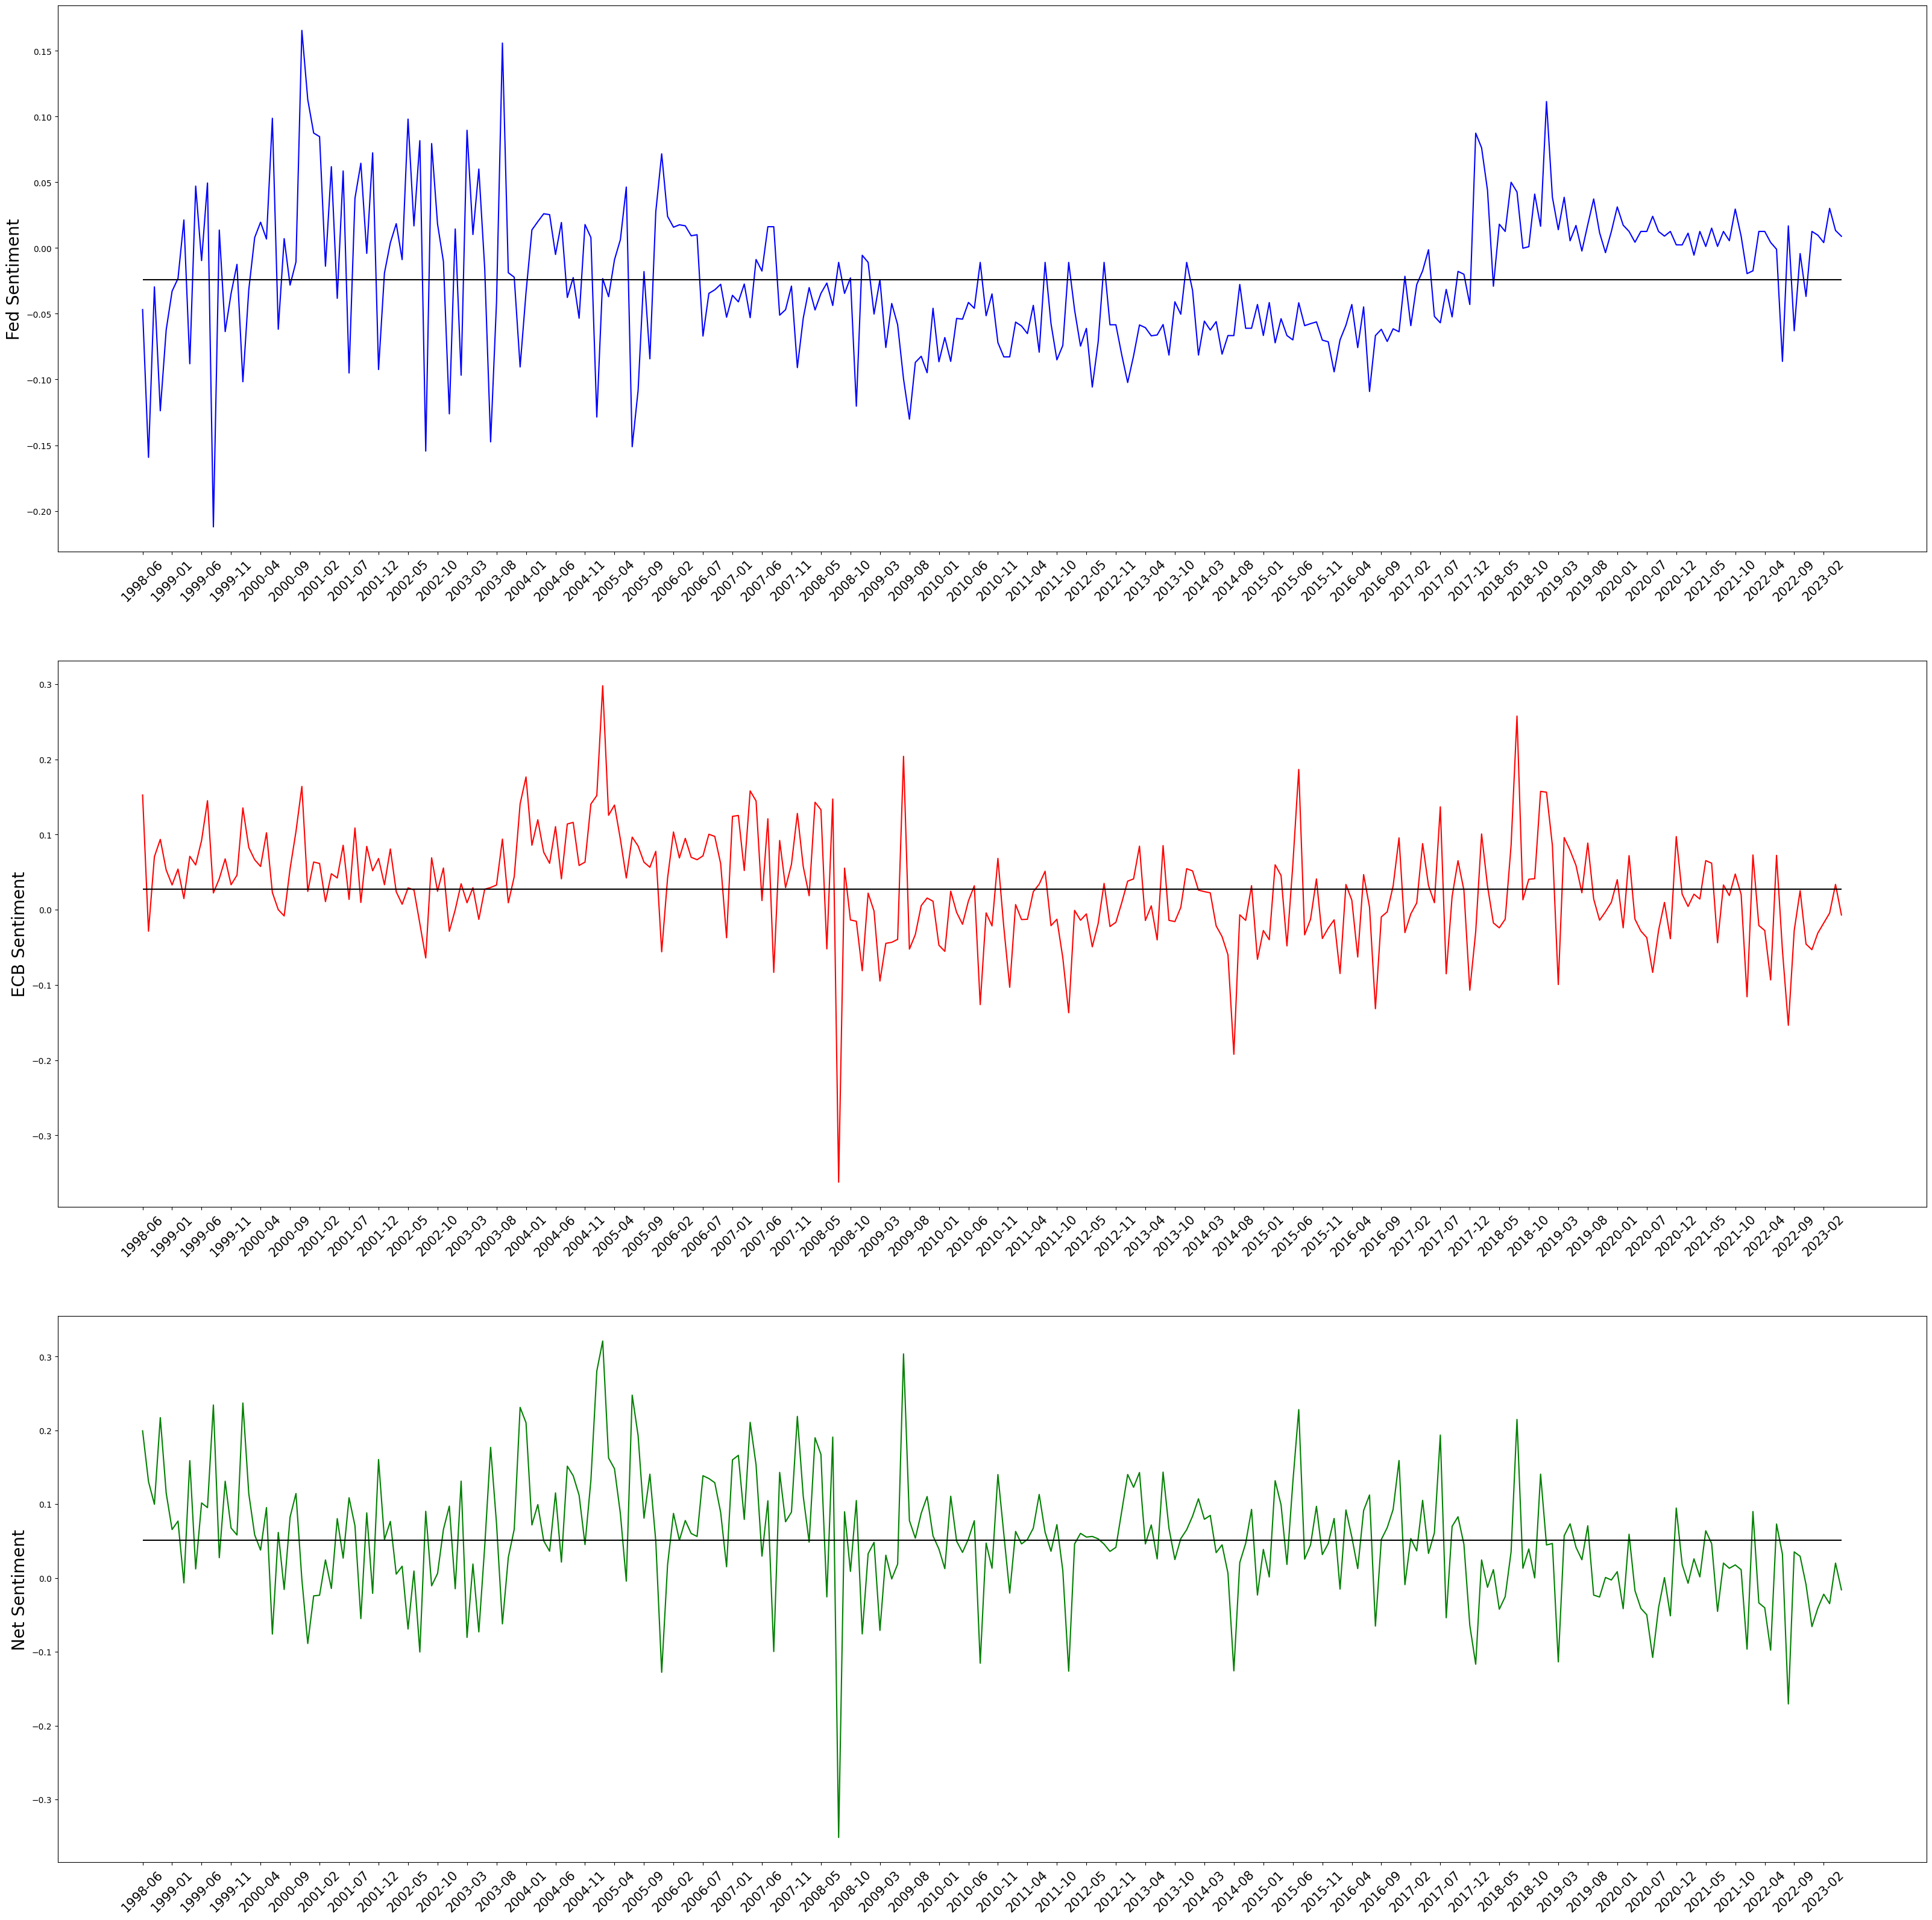

In [43]:


# Create a list of x-axis tick positions
num_ticks = 50  # Adjust this number as needed
x_tick_positions = df_merged['monthly'].iloc[::len(df_merged) // num_ticks].tolist()

y_0 = df_merged[f'{Body}_sentiment'].mean()
y_1 = df_merged[f'{Body_2}_sentiment'].mean()
y_2 = df_merged['net_diff_sent'].mean()

fig, axs = plt.subplots(3, 1, figsize=(40, 40))
axs[0].plot(df_merged['monthly'], df_merged[f'{Body}_sentiment'], color='blue', label='Net Sentiment')
axs[1].plot(df_merged['monthly'], df_merged[f'{Body_2}_sentiment'], color='red', label='Net Sentiment')
axs[0].hlines(y_0, df_merged['monthly'].min(), df_merged['monthly'].max(), color='black', label='Zero')
axs[1].hlines(y_1, df_merged['monthly'].min(), df_merged['monthly'].max(), color='black', label='Zero')

axs[2].plot(df_merged['monthly'], df_merged['net_diff_sent'], color='green', label='Net Sentiment')
axs[2].hlines(y_2, df_merged['monthly'].min(), df_merged['monthly'].max(), color='black', label='Zero')
# Set x-axis ticks for both subplots
axs[0].set_xticks(x_tick_positions)
axs[1].set_xticks(x_tick_positions)
axs[2].set_xticks(x_tick_positions)

axs[0].tick_params(axis='x', rotation=45, labelsize=15)
axs[1].tick_params(axis='x', rotation=45, labelsize=15)
axs[2].tick_params(axis='x', rotation=45, labelsize=15)

#axs[0].set_yticks(np.arange(-1, 1, .1))
#axs[1].set_yticks(np.arange(-1, 1, .1))
#axs[2].set_yticks(np.arange(-1, 1, .1))

axs[0].set_ylabel(f'{Body} Sentiment', fontsize=20)
axs[1].set_ylabel(f'{Body_2} Sentiment', fontsize=20)
axs[2].set_ylabel(f'Net Sentiment', fontsize=20)

plt.show()


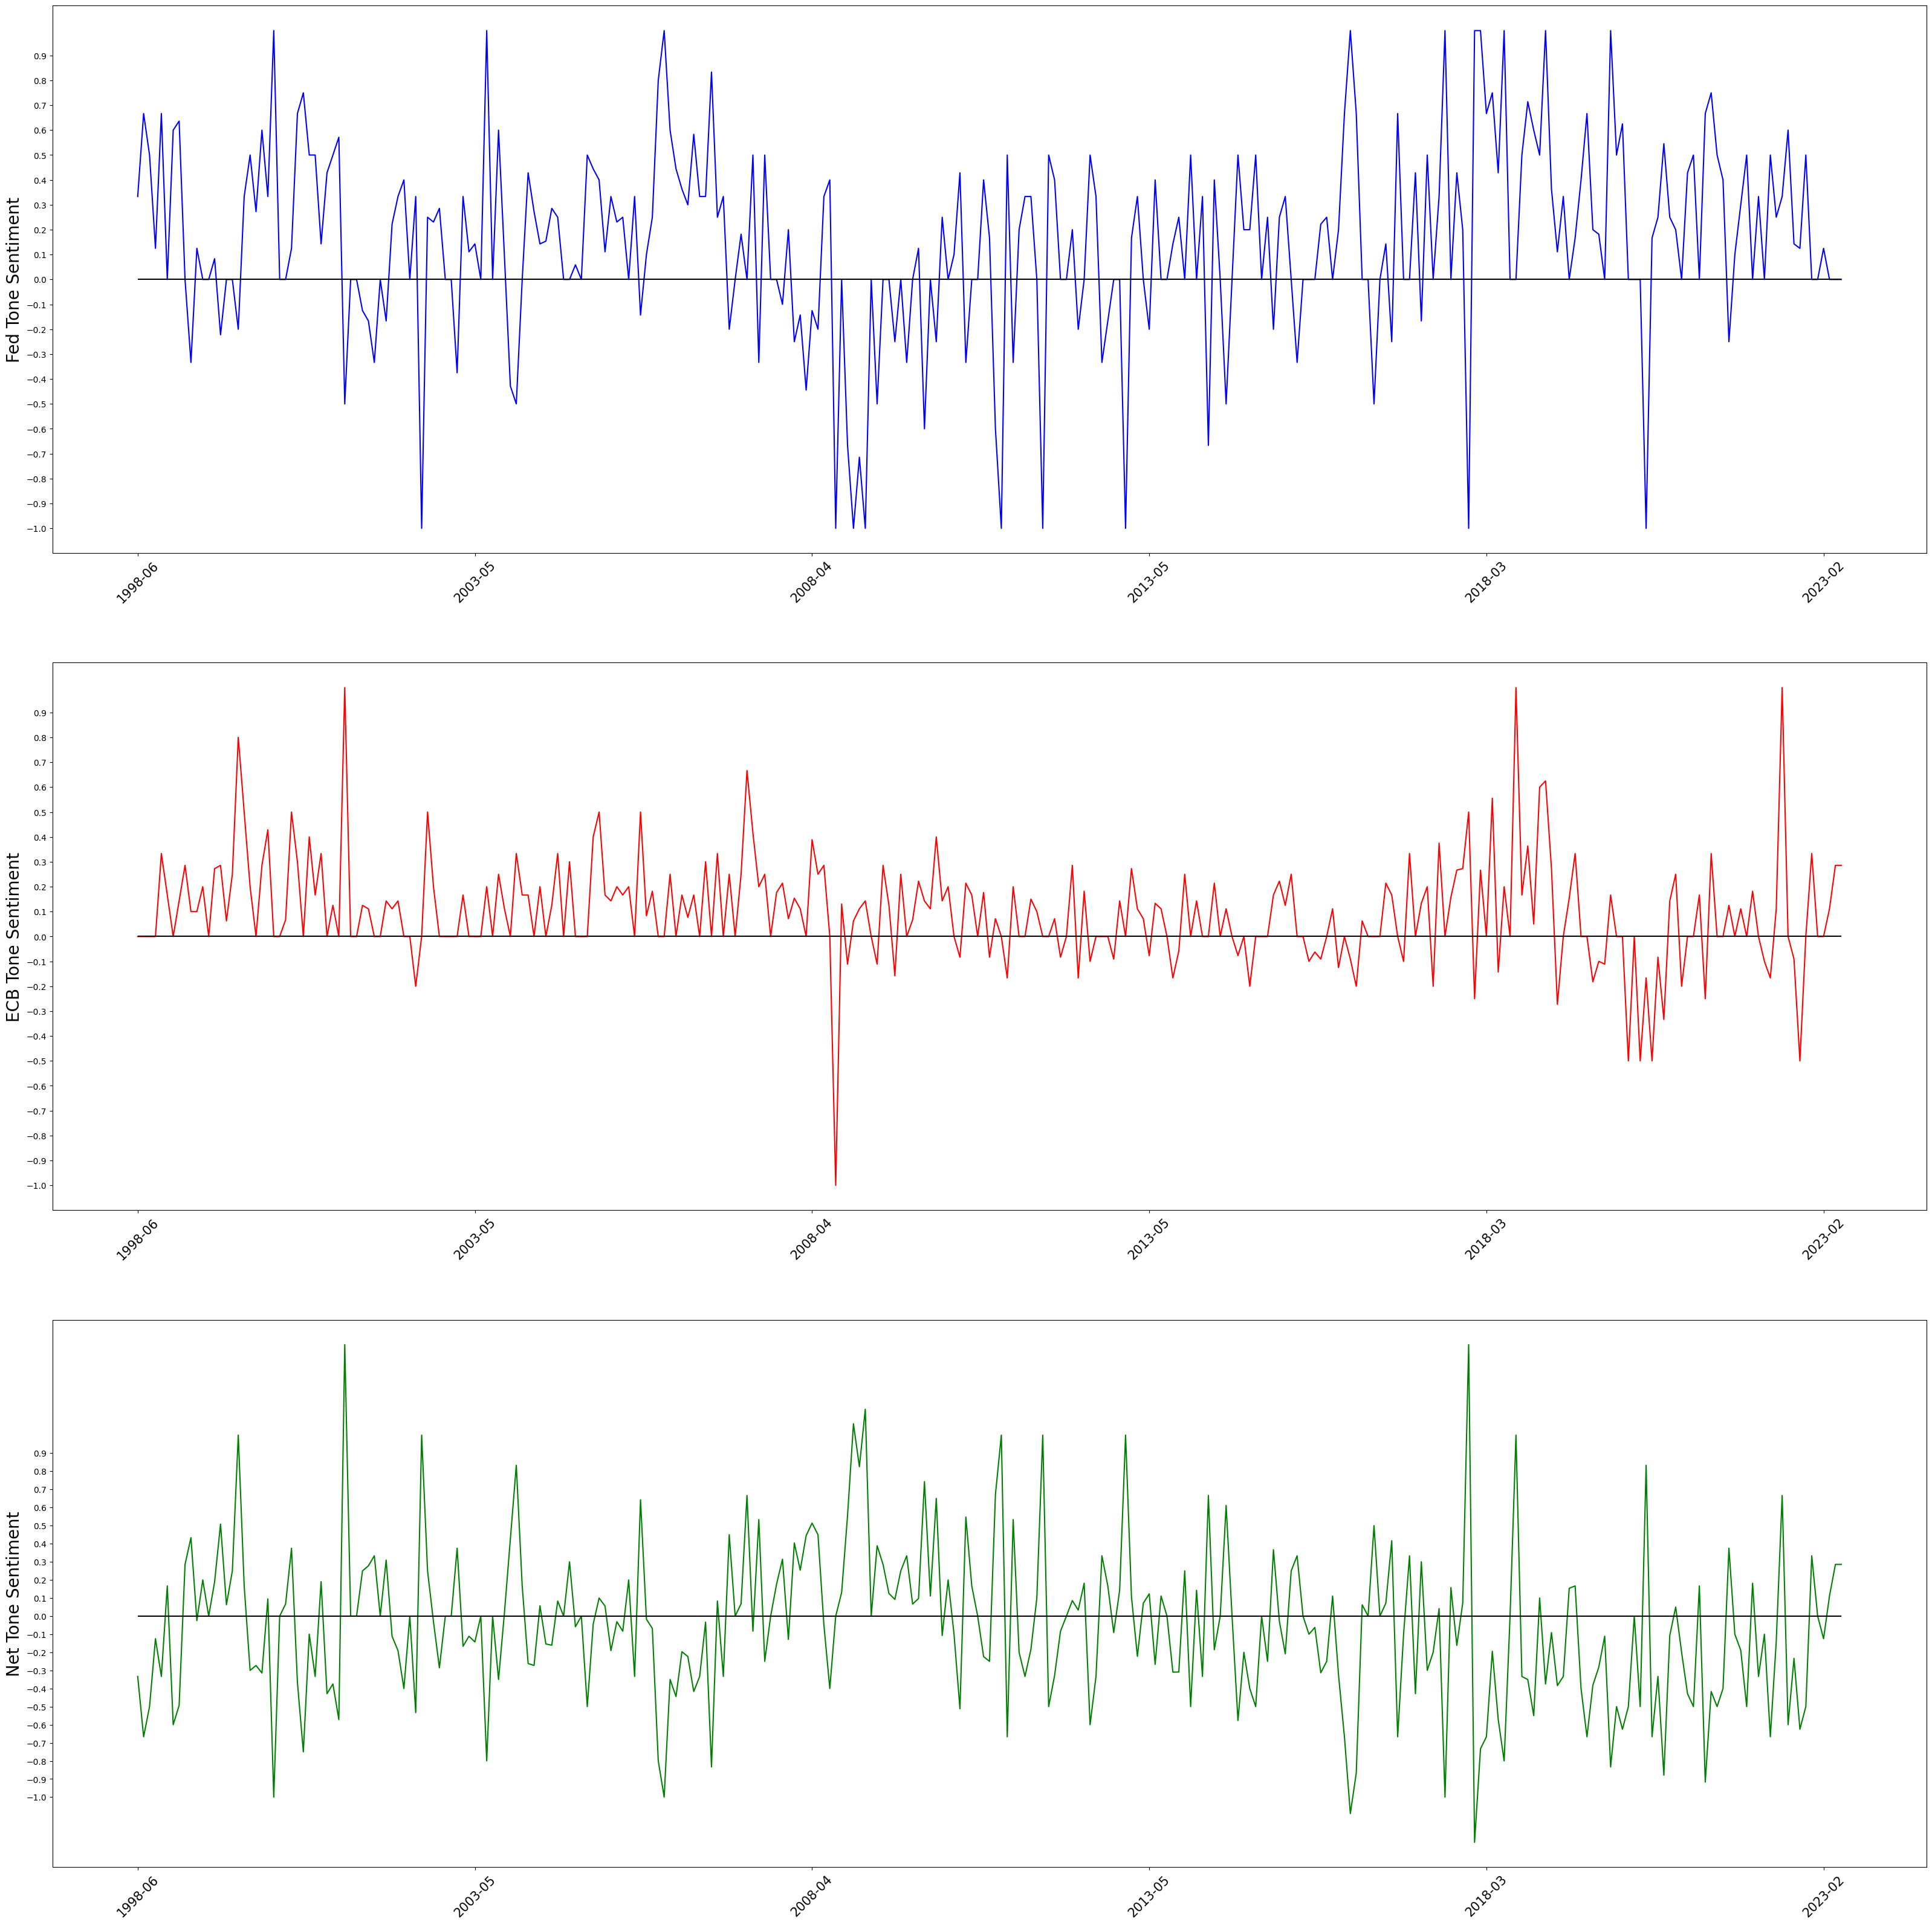

In [44]:
# Create a list of x-axis tick positions
num_ticks = 5  # Adjust this number as needed
x_tick_positions = df_merged['monthly'].iloc[::len(df_merged) // num_ticks].tolist()

y = 0
fig, axs = plt.subplots(3, 1, figsize=(40, 40))
axs[0].plot(df_merged['monthly'], df_merged[f'{Body}_tone'], color='blue', label='Net Tone')
axs[1].plot(df_merged['monthly'], df_merged[f'{Body_2}_tone'], color='red', label='Net Tone')
axs[0].hlines(y, df_merged['monthly'].min(), df_merged['monthly'].max(), color='black', label='Zero')
axs[1].hlines(y, df_merged['monthly'].min(), df_merged['monthly'].max(), color='black', label='Zero')

axs[2].plot(df_merged['monthly'], df_merged['net_diff_tone'], color='green', label='Net Sentiment')
axs[2].hlines(y, df_merged['monthly'].min(), df_merged['monthly'].max(), color='black', label='Zero')
# Set x-axis ticks for both subplots
axs[0].set_xticks(x_tick_positions)
axs[1].set_xticks(x_tick_positions)
axs[2].set_xticks(x_tick_positions)

axs[0].tick_params(axis='x', rotation=45, labelsize=15)
axs[1].tick_params(axis='x', rotation=45, labelsize=15)
axs[2].tick_params(axis='x', rotation=45, labelsize=15)

axs[1].set_yticks(np.arange(-1, 1, .1))
axs[0].set_yticks(np.arange(-1, 1, .1))
axs[2].set_yticks(np.arange(-1, 1, .1))

axs[0].set_ylabel(f'{Body} Tone Sentiment', fontsize=20)
axs[1].set_ylabel(f'{Body_2} Tone Sentiment', fontsize=20)
axs[2].set_ylabel(f'Net Tone Sentiment', fontsize=20)

plt.show()

In [45]:
print(len(df_merged))
df_merged.to_csv(f"{Sentiment_models}/{Body}_{Model}_vs_{Body_2}_{Model_2}_advanced_sentiment_texts.csv", index=False)
print(f"{Sentiment_models}/{Body}_{Model}_vs_{Body_2}_{Model_2}_advanced_sentiment_texts.csv")

289
/Users/kylenabors/Documents/Database/Models/Sentiment Analysis Models/Fed_Speeches_vs_ECB_Speeches_advanced_sentiment_texts.csv
